# Generate Embeddings

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('./data/IMDB Dataset.csv')

test_size = 0.2  # 20% of the data for testing
val_size = 0.1   # 10% of the data for validation
random_state = 11  

train_df, test_val_df = train_test_split(df, test_size=test_size + val_size, shuffle=True, random_state=random_state)
test_df, val_df = train_test_split(test_val_df, test_size=val_size/(test_size + val_size), shuffle=True, random_state=random_state)


In [4]:
from sentence_transformers import SentenceTransformer
import numpy as np
import os

model_name = 'paraphrase-MiniLM-L6-v2'  # You can choose a different model from Sentence Transformers

if f'train_{model_name}_embeddings.npy' not in os.listdir('./data/'):
    model = SentenceTransformer(model_name)
    train_embeddings = model.encode(train_df['review'].tolist())
    np.save('./data/' + f'train_{model_name}_embeddings.npy', train_embeddings)
else:
    train_embeddings = np.load('./data/' + f'train_{model_name}_embeddings.npy')
if f'val_{model_name}_embeddings.npy' not in os.listdir('./data/'):
    model_name = 'paraphrase-MiniLM-L6-v2'  # You can choose a different model from Sentence Transformers
    model = SentenceTransformer(model_name)
    val_embeddings = model.encode(val_df['review'].tolist())
    np.save('./data/' + f'val_{model_name}_embeddings.npy', val_embeddings)
else:
    val_embeddings = np.load('./data/' + f'val_{model_name}_embeddings.npy')
if f'test_{model_name}_embeddings.npy' not in os.listdir('./data/'):
    model_name = 'paraphrase-MiniLM-L6-v2'  # You can choose a different model from Sentence Transformers
    model = SentenceTransformer(model_name)
    test_embeddings = model.encode(test_df['review'].tolist())
    np.save('./data/' + f'test_{model_name}_embeddings.npy', test_embeddings)
else:
    test_embeddings = np.load('./data/' + f'test_{model_name}_embeddings.npy')

# PCA

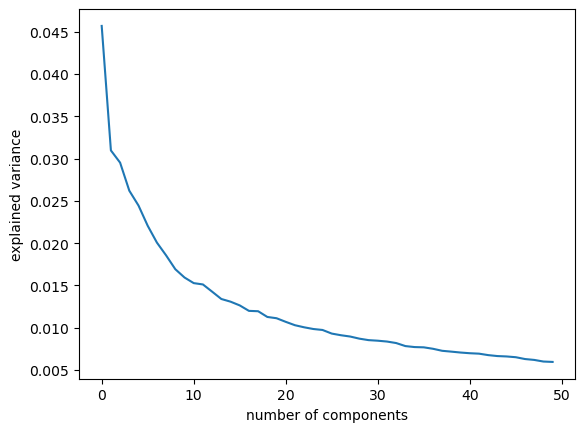

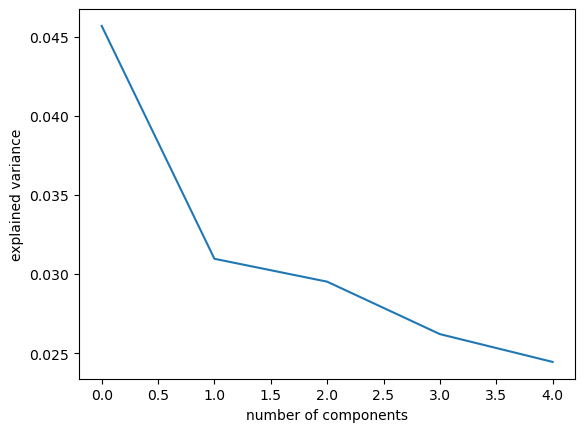

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

n_components = 50  # Adjust this based on your requirements
pca = PCA(n_components=n_components)
embeddings_pca = pca.fit_transform(train_embeddings) # (50000, 3)
explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(np.arange(len(explained_variance_ratio)), explained_variance_ratio)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

plt.plot(np.arange(len(explained_variance_ratio[:5])), explained_variance_ratio[:5])
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()


# KNN

In [25]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

cl1 = ['Cluster 1']
cl2 = ['Cluster 2']
for n_components in range(1,6):
    pca = PCA(n_components=n_components)

    train_embeddings_pca = pca.fit_transform(train_embeddings) # (n_samples, n_components)
    val_embeddings_pca = pca.fit_transform(val_embeddings) 
    test_embeddings_pca = pca.fit_transform(test_embeddings) 

    kmeans = KMeans(n_clusters=2, random_state=11, n_init='auto')
    kmeans.fit(train_embeddings_pca)
    train_df['cluster'] = kmeans.labels_

    
    cluster0 = train_df[train_df['cluster'] == 0]
    x = (cluster0['sentiment'] == 'positive').astype(int)
    cluster0_pos = x.mean()
    print(cluster0_pos)
    cl1.append(cluster0_pos)

    cluster1 = train_df[train_df['cluster'] == 1]
    x = (cluster1['sentiment'] == 'positive').astype(int)
    cluster1_pos = x.mean()
    print(cluster1_pos)
    cl2.append(cluster1_pos)


    print()

from tabulate import tabulate
print('Clusters on y-axis, No. PCA Components on x-axis')
print(tabulate([cl1, cl2], headers=["No. PCA Components"]+list(range(1,6)), tablefmt="heavy_outline"))

0.574052743255532
0.4319606571552097

0.5756654916737571
0.43084389323267724

0.4351970865467009
0.5718135603601396

0.43619749919846107
0.571016272643537

0.4352738620467018
0.5710107841345275

Clusters on y-axis, No. PCA Components on x-axis
┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃ No. PCA Components   ┃        1 ┃        2 ┃        3 ┃        4 ┃        5 ┃
┣━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━┫
┃ Cluster 1            ┃ 0.574053 ┃ 0.575665 ┃ 0.435197 ┃ 0.436197 ┃ 0.435274 ┃
┃ Cluster 2            ┃ 0.431961 ┃ 0.430844 ┃ 0.571814 ┃ 0.571016 ┃ 0.571011 ┃
┗━━━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━┻━━━━━━━━━━┻━━━━━━━━━━┻━━━━━━━━━━┻━━━━━━━━━━┛
